# MLP vs CNN on MNIST

This notebook compares a simple fully-connected neural network (MLP) and a tiny convolutional neural network (CNN) on the MNIST digit classification task.

In [50]:
!pip install torch
!pip install torchvision
!pip scikit-learn

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

ERROR: unknown command "scikit-learn"


In [51]:
# Load MNIST
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

## MLP Model

In [52]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

## Tiny CNN Model

In [53]:
class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)
        return self.fc1(x)

## Training Function

In [54]:
def train_model(model, trainloader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

## Evaluation Function

In [55]:
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    return accuracy

## Compare MLP and CNN

In [56]:
def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters:     {total}")
    print(f"Trainable parameters: {trainable}")
    return total, trainable

mlp = MLP()
print("MLP Parameters:")
count_parameters(mlp)

cnn = TinyCNN()
print("\nCNN Parameters:")
count_parameters(cnn)

# MLP
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.01)
print("Training MLP")
train_model(mlp, trainloader, criterion, optimizer, epochs=25)
print("Evaluating MLP")
mlp_acc = evaluate_model(mlp, testloader)

# CNN
cnn = TinyCNN()
optimizer = optim.Adam(cnn.parameters(), lr=0.01)
print("\nTraining CNN")
train_model(cnn, trainloader, criterion, optimizer, epochs=25)
print("Evaluating CNN")
cnn_acc = evaluate_model(cnn, testloader)

MLP Parameters:
Total parameters:     101770
Trainable parameters: 101770

CNN Parameters:
Total parameters:     9098
Trainable parameters: 9098
Training MLP
Epoch 1, Loss: 0.2176
Epoch 2, Loss: 0.1291
Epoch 3, Loss: 0.1131
Epoch 4, Loss: 0.0988
Epoch 5, Loss: 0.0986
Epoch 6, Loss: 0.0904
Epoch 7, Loss: 0.0806
Epoch 8, Loss: 0.0802
Epoch 9, Loss: 0.0703
Epoch 10, Loss: 0.0712
Epoch 11, Loss: 0.0733
Epoch 12, Loss: 0.0658
Epoch 13, Loss: 0.0668
Epoch 14, Loss: 0.0602
Epoch 15, Loss: 0.0557
Epoch 16, Loss: 0.0644
Epoch 17, Loss: 0.0620
Epoch 18, Loss: 0.0585
Epoch 19, Loss: 0.0601
Epoch 20, Loss: 0.0588
Epoch 21, Loss: 0.0579
Epoch 22, Loss: 0.0486
Epoch 23, Loss: 0.0504
Epoch 24, Loss: 0.0573
Epoch 25, Loss: 0.0599
Evaluating MLP
Accuracy: 97.21%

Training CNN
Epoch 1, Loss: 0.1617
Epoch 2, Loss: 0.0706
Epoch 3, Loss: 0.0620
Epoch 4, Loss: 0.0573
Epoch 5, Loss: 0.0542
Epoch 6, Loss: 0.0480
Epoch 7, Loss: 0.0483
Epoch 8, Loss: 0.0460
Epoch 9, Loss: 0.0449
Epoch 10, Loss: 0.0425
Epoch 11,

In [48]:
model = TinyCNN()

# Step-by-step breakdown
x = torch.randn(1, 1, 28, 28)  # batch of 1 image

print("Input:", x.shape)

x = model.conv1(x)
print("After conv1:", x.shape)

x = torch.relu(x)
x = model.pool(x)
print("After pool1:", x.shape)

x = model.conv2(x)
print("After conv2:", x.shape)

x = torch.relu(x)
x = model.pool(x)
print("After pool2:", x.shape)

x = x.view(-1, 16 * 7 * 7)
print("After flatten:", x.shape)

x = model.fc1(x)
print("Output logits:", x.shape)

Input: torch.Size([1, 1, 28, 28])
After conv1: torch.Size([1, 8, 28, 28])
After pool1: torch.Size([1, 8, 14, 14])
After conv2: torch.Size([1, 16, 14, 14])
After pool2: torch.Size([1, 16, 7, 7])
After flatten: torch.Size([1, 784])
Output logits: torch.Size([1, 10])


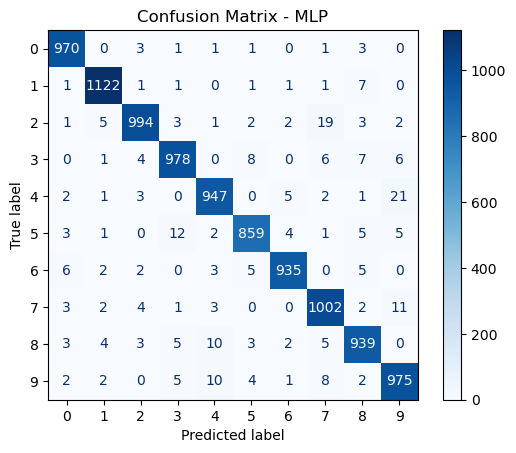


📊 Classification Report for MLP:

              precision    recall  f1-score   support

           0      0.979     0.990     0.984       980
           1      0.984     0.989     0.986      1135
           2      0.980     0.963     0.972      1032
           3      0.972     0.968     0.970      1010
           4      0.969     0.964     0.967       982
           5      0.973     0.963     0.968       892
           6      0.984     0.976     0.980       958
           7      0.959     0.975     0.967      1028
           8      0.964     0.964     0.964       974
           9      0.956     0.966     0.961      1009

    accuracy                          0.972     10000
   macro avg      0.972     0.972     0.972     10000
weighted avg      0.972     0.972     0.972     10000



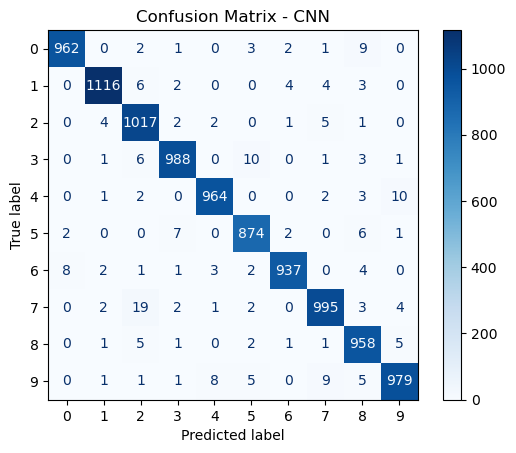


📊 Classification Report for CNN:

              precision    recall  f1-score   support

           0      0.990     0.982     0.986       980
           1      0.989     0.983     0.986      1135
           2      0.960     0.985     0.973      1032
           3      0.983     0.978     0.981      1010
           4      0.986     0.982     0.984       982
           5      0.973     0.980     0.977       892
           6      0.989     0.978     0.984       958
           7      0.977     0.968     0.973      1028
           8      0.963     0.984     0.973       974
           9      0.979     0.970     0.975      1009

    accuracy                          0.979     10000
   macro avg      0.979     0.979     0.979     10000
weighted avg      0.979     0.979     0.979     10000



In [59]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix_and_metrics(model, testloader, model_name="Model"):
    all_preds = []
    all_labels = []
    
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Precision and Recall
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(all_labels, all_preds, digits=3))


plot_confusion_matrix_and_metrics(mlp, testloader, model_name="MLP")
plot_confusion_matrix_and_metrics(cnn, testloader, model_name="CNN")